# Table of Contents

1. [Imports](#2.-Imports)
2. [Installations](#3.-Installations)
3. [Cross-Validate](#9.-Cross-Validate)


#  Imports

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

#Facebook Prophet
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

# Installations

In [3]:
#!pip install prophet

# Import Data

In [4]:
df=pd.read_csv('https://storage.googleapis.com/energy_usage_prediction_903/small_data_v2.csv')

In [5]:
df

,Unnamed: 0,LCLid,Acorn_Group,DateTime,KWH/hh
0,0,MAC000018,E,2011-12-07 09:30:00,0.303
1,1,MAC000018,E,2011-12-07 10:00:00,0.200
2,2,MAC000018,E,2011-12-07 10:30:00,0.218
3,3,MAC000018,E,2011-12-07 11:00:00,0.209
4,4,MAC000018,E,2011-12-07 11:30:00,0.210
...,...,...,...,...,...
2969390,2969471,MAC000897,B,2014-02-27 22:30:00,0.174
2969391,2969472,MAC000897,B,2014-02-27 23:00:00,0.119
2969392,2969473,MAC000897,B,2014-02-27 23:30:00,0.111
2969393,2969474,MAC000897,B,2014-02-28 00:00:00,0.050


In [6]:
df.drop(columns='Unnamed: 0',inplace=True)

In [7]:
df

,LCLid,Acorn_Group,DateTime,KWH/hh
0,MAC000018,E,2011-12-07 09:30:00,0.303
1,MAC000018,E,2011-12-07 10:00:00,0.200
2,MAC000018,E,2011-12-07 10:30:00,0.218
3,MAC000018,E,2011-12-07 11:00:00,0.209
4,MAC000018,E,2011-12-07 11:30:00,0.210
...,...,...,...,...
2969390,MAC000897,B,2014-02-27 22:30:00,0.174
2969391,MAC000897,B,2014-02-27 23:00:00,0.119
2969392,MAC000897,B,2014-02-27 23:30:00,0.111
2969393,MAC000897,B,2014-02-28 00:00:00,0.050


# Exploratory Data Analysis 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2969395 entries, 0 to 2969394
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   LCLid        object 
 1   Acorn_Group  object 
 2   DateTime     object 
 3   KWH/hh       float64
dtypes: float64(1), object(3)
memory usage: 90.6+ MB


In [9]:
df['DateTime'] = pd.DatetimeIndex(df['DateTime'])

In [10]:
df.dtypes

LCLid                  object
Acorn_Group            object
DateTime       datetime64[ns]
KWH/hh                float64
dtype: object

In [11]:
df2=df.groupby(by=["Acorn_Group",df.DateTime]).mean()

In [12]:
df2

KWH/hh
Acorn_Group DateTime                   
A           2011-12-03 09:00:00  0.1490
            2011-12-03 09:30:00  0.1540
            2011-12-03 10:00:00  0.7680
            2011-12-03 10:30:00  1.1790
            2011-12-03 11:00:00  0.5880
...                                 ...
Q           2014-02-27 22:00:00  0.1298
            2014-02-27 22:30:00  0.1326
            2014-02-27 23:00:00  0.3296
            2014-02-27 23:30:00  0.2938
            2014-02-28 00:00:00  0.7102

[652429 rows x 1 columns]

In [13]:
df2.unstack(level=0)

KWH/hh                                                    \
Acorn_Group               A      B         C       D        E       F       G   
DateTime                                                                        
2011-11-23 11:00:00     NaN    NaN       NaN     NaN      NaN     NaN  0.1300   
2011-11-23 11:30:00     NaN    NaN       NaN     NaN      NaN     NaN  0.1620   
2011-11-23 12:00:00     NaN    NaN       NaN     NaN      NaN     NaN  0.0780   
2011-11-23 12:30:00     NaN    NaN       NaN     NaN      NaN     NaN  0.0590   
2011-11-23 13:00:00     NaN    NaN       NaN     NaN      NaN     NaN  0.0580   
...                     ...    ...       ...     ...      ...     ...     ...   
2014-02-27 22:00:00  0.7598  0.146  0.477000  0.7144  0.33675  0.2668  0.1706   
2014-02-27 22:30:00  0.5234  0.174  0.406667  0.6074  0.33775  0.3218  0.1404   
2014-02-27 23:00:00  0.4336  0.119  0.414333  0.3862  0.47100  0.2160  0.1528   
2014-02-27 23:30:00  0.4786  0.111  0.424333  0.4122  0.29125  0.1792  0.1338   
2014-02-28 00:00:00  0.2356  0.050  0.378000  0.3458  0.87200  0.1530  0.1096   

                                                                       \
Acorn_Group               H       I       J       K       L         M   
DateTime                                                                
2011-11-23 11:00:00     NaN     NaN     NaN     NaN     NaN       NaN   
2011-11-23 11:30:00     NaN     NaN     NaN     NaN     NaN       NaN   
2011-11-23 12:00:00     NaN     NaN     NaN     NaN     NaN       NaN   
2011-11-23 12:30:00     NaN     NaN     NaN     NaN     NaN       NaN   
2011-11-23 13:00:00     NaN     NaN     NaN     NaN     NaN       NaN   
...                     ...     ...     ...     ...     ...       ...   
2014-02-27 22:00:00  0.2700  0.3524  0.2504  0.1850  0.3166  0.085000   
2014-02-27 22:30:00  0.2310  0.7008  0.2264  0.2244  0.3452  0.106667   
2014-02-27 23:00:00  0.2134  0.5512  0.1234  0.1730  0.2784  0.082667   
2014-02-27 23:30:00  0.1808  0.2878  0.1020  0.1426  0.1648  0.082000   
2014-02-28 00:00:00  0.1568  0.1082  0.0824  0.1600  0.1336  0.070667   

                                                      
Acorn_Group                N       O       P       Q  
DateTime                                              
2011-11-23 11:00:00      NaN     NaN     NaN     NaN  
2011-11-23 11:30:00      NaN     NaN     NaN     NaN  
2011-11-23 12:00:00      NaN     NaN     NaN     NaN  
2011-11-23 12:30:00      NaN     NaN     NaN     NaN  
2011-11-23 13:00:00      NaN     NaN     NaN     NaN  
...                      ...     ...     ...     ...  
2014-02-27 22:00:00  0.36775  0.1414  0.0724  0.1298  
2014-02-27 22:30:00  0.22275  0.1226  0.0692  0.1326  
2014-02-27 23:00:00  0.22525  0.1000  0.0504  0.3296  
2014-02-27 23:30:00  0.18375  0.0958  0.0446  0.2938  
2014-02-28 00:00:00  0.15275  0.1012  0.3232  0.7102  

[39723 rows x 17 columns]

In [14]:
df3=df2.unstack(level=0).dropna()

In [15]:
df3

KWH/hh                                                    \
Acorn_Group               A      B         C       D        E       F       G   
DateTime                                                                        
2012-04-27 10:00:00  0.1940  0.181  0.494600  0.5400  0.31600  0.1726  0.2802   
2012-04-27 10:30:00  0.2048  0.102  0.343000  0.3030  0.90400  0.1776  0.1352   
2012-04-27 11:00:00  0.2572  0.108  0.341000  0.3308  0.67940  0.1710  0.2268   
2012-04-27 11:30:00  0.1882  0.844  0.344000  0.2574  0.65600  0.1486  0.1372   
2012-04-27 12:00:00  0.1478  0.168  0.274000  0.3564  0.23600  0.3180  0.1666   
...                     ...    ...       ...     ...      ...     ...     ...   
2014-02-27 22:00:00  0.7598  0.146  0.477000  0.7144  0.33675  0.2668  0.1706   
2014-02-27 22:30:00  0.5234  0.174  0.406667  0.6074  0.33775  0.3218  0.1404   
2014-02-27 23:00:00  0.4336  0.119  0.414333  0.3862  0.47100  0.2160  0.1528   
2014-02-27 23:30:00  0.4786  0.111  0.424333  0.4122  0.29125  0.1792  0.1338   
2014-02-28 00:00:00  0.2356  0.050  0.378000  0.3458  0.87200  0.1530  0.1096   

                                                                       \
Acorn_Group               H       I       J       K       L         M   
DateTime                                                                
2012-04-27 10:00:00  0.1254  0.1854  0.1588  0.1374  0.1768  0.175000   
2012-04-27 10:30:00  0.1814  0.0904  0.2120  0.1352  0.1084  0.137800   
2012-04-27 11:00:00  0.1626  0.0780  0.1274  0.1312  0.3470  0.158600   
2012-04-27 11:30:00  0.1688  0.1134  0.1190  0.1688  0.3288  0.224800   
2012-04-27 12:00:00  0.1760  0.2232  0.1122  0.1738  0.2708  0.158400   
...                     ...     ...     ...     ...     ...       ...   
2014-02-27 22:00:00  0.2700  0.3524  0.2504  0.1850  0.3166  0.085000   
2014-02-27 22:30:00  0.2310  0.7008  0.2264  0.2244  0.3452  0.106667   
2014-02-27 23:00:00  0.2134  0.5512  0.1234  0.1730  0.2784  0.082667   
2014-02-27 23:30:00  0.1808  0.2878  0.1020  0.1426  0.1648  0.082000   
2014-02-28 00:00:00  0.1568  0.1082  0.0824  0.1600  0.1336  0.070667   

                                                      
Acorn_Group                N       O       P       Q  
DateTime                                              
2012-04-27 10:00:00  0.13220  0.0470  0.0648  0.2768  
2012-04-27 10:30:00  0.09920  0.0370  0.0926  0.3080  
2012-04-27 11:00:00  0.13500  0.0960  0.0632  0.1740  
2012-04-27 11:30:00  0.10640  0.0638  0.0648  0.1202  
2012-04-27 12:00:00  0.06660  0.0508  0.0884  0.1246  
...                      ...     ...     ...     ...  
2014-02-27 22:00:00  0.36775  0.1414  0.0724  0.1298  
2014-02-27 22:30:00  0.22275  0.1226  0.0692  0.1326  
2014-02-27 23:00:00  0.22525  0.1000  0.0504  0.3296  
2014-02-27 23:30:00  0.18375  0.0958  0.0446  0.2938  
2014-02-28 00:00:00  0.15275  0.1012  0.3232  0.7102  

[32161 rows x 17 columns]

In [16]:
df3['KWH/hh'][['A']]

Acorn_Group,A
DateTime,
2012-04-27 10:00:00,0.1940
2012-04-27 10:30:00,0.2048
2012-04-27 11:00:00,0.2572
2012-04-27 11:30:00,0.1882
2012-04-27 12:00:00,0.1478
...,...
2014-02-27 22:00:00,0.7598
2014-02-27 22:30:00,0.5234
2014-02-27 23:00:00,0.4336


Text(0, 0.5, 'Energy(kW/HH)')

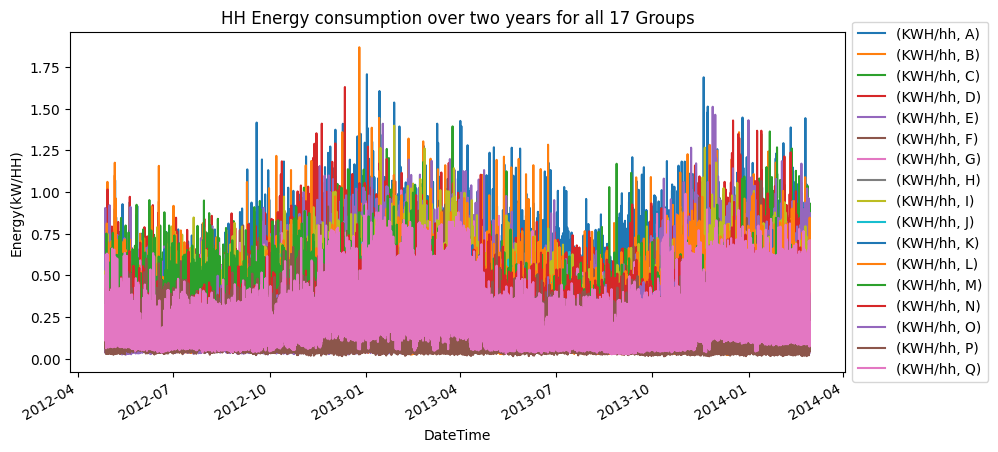

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
df3.plot(ax=ax)

plt.title('HH Energy consumption over two years for all 17 Groups', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Energy(kW/HH)")

<AxesSubplot:xlabel='DateTime'>

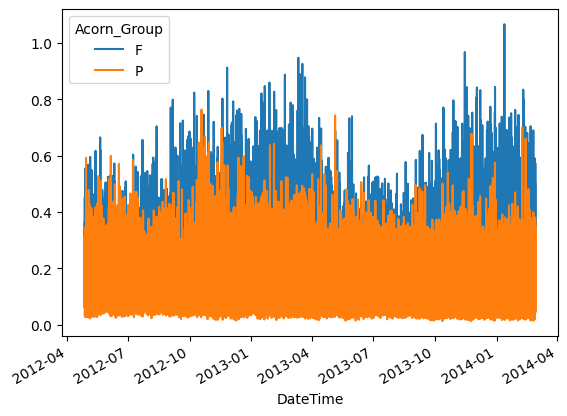

In [18]:
df3['KWH/hh'][['F','P']].plot()

In [19]:
df4=df3.copy()
df4.describe()['KWH/hh']['A']

count    32161.000000
mean         0.356285
std          0.200310
min          0.092800
25%          0.201400
50%          0.310600
75%          0.456800
max          1.706800
Name: A, dtype: float64

In [20]:
mean_groups=pd.DataFrame(df4.describe().iloc[1,:].unstack(level=0))
mean_groups=mean_groups.reset_index()
mean_groups

,Acorn_Group,KWH/hh
0,A,0.356285
1,B,0.106311
2,C,0.282863
3,D,0.308251
4,E,0.277499
5,F,0.209428
6,G,0.200679
7,H,0.208913
8,I,0.204354
9,J,0.172194


<AxesSubplot:xlabel='Acorn_Group', ylabel='KWH/hh'>

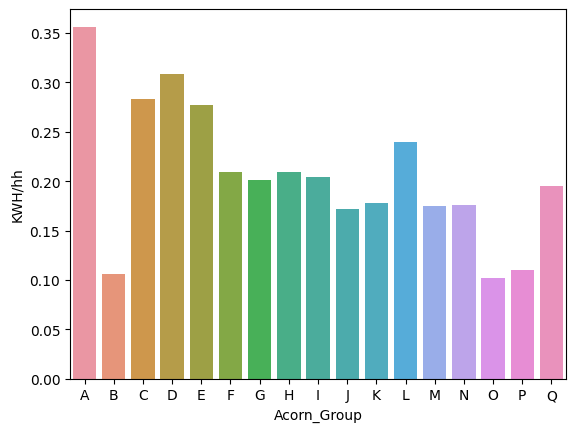

In [21]:
sns.barplot(x=mean_groups['Acorn_Group'],y=mean_groups['KWH/hh'])

In [22]:
df.index = df['DateTime']
df.drop(columns='DateTime')
dfgrouped=df.groupby(by=[df.index.day,df.index.month,'Acorn_Group']).mean()

In [23]:
dfgrouped

KWH/hh
DateTime DateTime Acorn_Group          
1        1        A            0.494485
                  B            0.110760
                  C            0.380783
                  D            0.328249
                  E            0.424665
...                                 ...
31       12       M            0.239487
                  N            0.191631
                  O            0.127910
                  P            0.130493
                  Q            0.267524

[6220 rows x 1 columns]

# Preprocessing Data

In [24]:
df

,LCLid,Acorn_Group,DateTime,KWH/hh
DateTime,,,,
2011-12-07 09:30:00,MAC000018,E,2011-12-07 09:30:00,0.303
2011-12-07 10:00:00,MAC000018,E,2011-12-07 10:00:00,0.200
2011-12-07 10:30:00,MAC000018,E,2011-12-07 10:30:00,0.218
2011-12-07 11:00:00,MAC000018,E,2011-12-07 11:00:00,0.209
2011-12-07 11:30:00,MAC000018,E,2011-12-07 11:30:00,0.210
...,...,...,...,...
2014-02-27 22:30:00,MAC000897,B,2014-02-27 22:30:00,0.174
2014-02-27 23:00:00,MAC000897,B,2014-02-27 23:00:00,0.119
2014-02-27 23:30:00,MAC000897,B,2014-02-27 23:30:00,0.111


In [25]:
print(df.index.hour.unique())
print(df.index.minute.unique())

Int64Index([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,
             2,  3,  4,  5,  6,  7,  8],
           dtype='int64', name='DateTime')
Int64Index([30, 0], dtype='int64', name='DateTime')


In [26]:
df5=df.loc[:,['Acorn_Group','KWH/hh']]

In [27]:
data_gla=df5.groupby(by=df5.index).mean()
data_gla

,KWH/hh
DateTime,
2011-11-23 11:00:00,0.130000
2011-11-23 11:30:00,0.162000
2011-11-23 12:00:00,0.078000
2011-11-23 12:30:00,0.059000
2011-11-23 13:00:00,0.058000
...,...
2014-02-27 22:00:00,0.303973
2014-02-27 22:30:00,0.295760
2014-02-27 23:00:00,0.259133


In [28]:
data_gla=data_gla.reset_index()
data_gla

,DateTime,KWH/hh
0,2011-11-23 11:00:00,0.130000
1,2011-11-23 11:30:00,0.162000
2,2011-11-23 12:00:00,0.078000
3,2011-11-23 12:30:00,0.059000
4,2011-11-23 13:00:00,0.058000
...,...,...
39718,2014-02-27 22:00:00,0.303973
39719,2014-02-27 22:30:00,0.295760
39720,2014-02-27 23:00:00,0.259133
39721,2014-02-27 23:30:00,0.214800


In [29]:
data_gla.rename(columns={"DateTime": "ds", "KWH/hh": "y"},inplace=True)
data_gla

,ds,y
0,2011-11-23 11:00:00,0.130000
1,2011-11-23 11:30:00,0.162000
2,2011-11-23 12:00:00,0.078000
3,2011-11-23 12:30:00,0.059000
4,2011-11-23 13:00:00,0.058000
...,...,...
39718,2014-02-27 22:00:00,0.303973
39719,2014-02-27 22:30:00,0.295760
39720,2014-02-27 23:00:00,0.259133
39721,2014-02-27 23:30:00,0.214800


# Train Model

In [30]:
m = Prophet(changepoint_prior_scale=0.01).fit(data_gla)

19:58:20 - cmdstanpy - INFO - Chain [1] start processing
19:59:33 - cmdstanpy - INFO - Chain [1] done processing


# Forecast

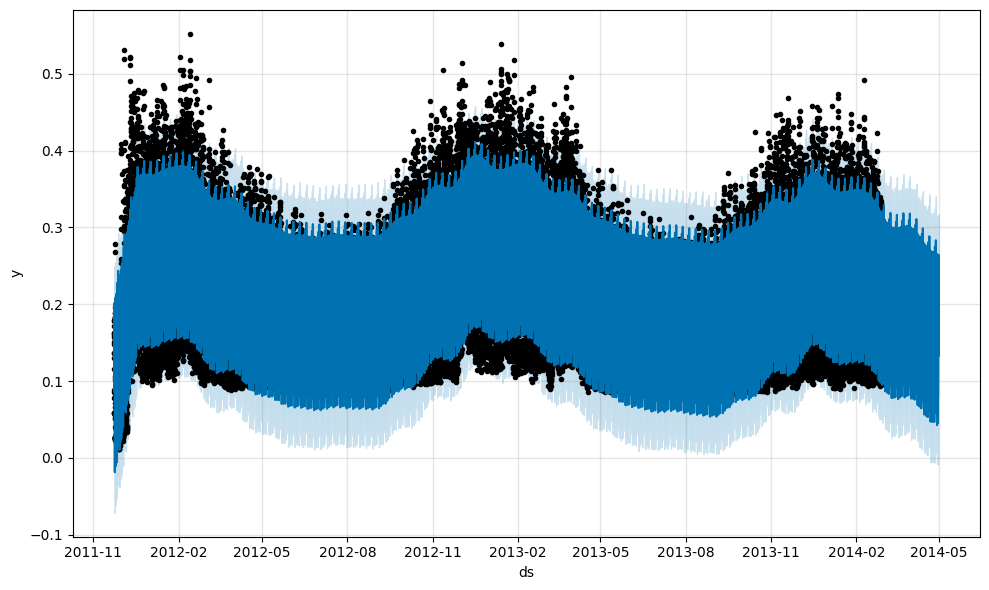

In [31]:
future = m.make_future_dataframe(periods=1488, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

In [32]:
future

,ds
0,2011-11-23 11:00:00
1,2011-11-23 11:30:00
2,2011-11-23 12:00:00
3,2011-11-23 12:30:00
4,2011-11-23 13:00:00
...,...
41206,2014-04-30 20:00:00
41207,2014-04-30 21:00:00
41208,2014-04-30 22:00:00
41209,2014-04-30 23:00:00


In [33]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-11-23 11:00:00,0.064957,0.041211,0.138526,0.064957,0.064957,0.027792,0.027792,0.027792,0.006194,...,-0.003134,-0.003134,-0.003134,0.024732,0.024732,0.024732,0.0,0.0,0.0,0.092748
1,2011-11-23 11:30:00,0.065054,0.043177,0.139940,0.065054,0.065054,0.027376,0.027376,0.027376,0.005806,...,-0.003176,-0.003176,-0.003176,0.024747,0.024747,0.024747,0.0,0.0,0.0,0.092431
2,2011-11-23 12:00:00,0.065152,0.042335,0.143176,0.065152,0.065152,0.026593,0.026593,0.026593,0.005053,...,-0.003221,-0.003221,-0.003221,0.024762,0.024762,0.024762,0.0,0.0,0.0,0.091745
3,2011-11-23 12:30:00,0.065249,0.042992,0.136786,0.065249,0.065249,0.025418,0.025418,0.025418,0.003910,...,-0.003270,-0.003270,-0.003270,0.024777,0.024777,0.024777,0.0,0.0,0.0,0.090667
4,2011-11-23 13:00:00,0.065347,0.044714,0.136839,0.065347,0.065347,0.023941,0.023941,0.023941,0.002470,...,-0.003321,-0.003321,-0.003321,0.024792,0.024792,0.024792,0.0,0.0,0.0,0.089288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41206,2014-04-30 20:00:00,0.177958,0.216637,0.316857,0.161763,0.190283,0.086330,0.086330,0.086330,0.112450,...,-0.004160,-0.004160,-0.004160,-0.021960,-0.021960,-0.021960,0.0,0.0,0.0,0.264288
41207,2014-04-30 21:00:00,0.177953,0.192045,0.293903,0.161746,0.190308,0.065646,0.065646,0.065646,0.091881,...,-0.004269,-0.004269,-0.004269,-0.021966,-0.021966,-0.021966,0.0,0.0,0.0,0.243599
41208,2014-04-30 22:00:00,0.177948,0.156530,0.256777,0.161730,0.190334,0.030338,0.030338,0.030338,0.056679,...,-0.004369,-0.004369,-0.004369,-0.021972,-0.021972,-0.021972,0.0,0.0,0.0,0.208286
41209,2014-04-30 23:00:00,0.177943,0.115128,0.217359,0.161713,0.190359,-0.008693,-0.008693,-0.008693,0.017742,...,-0.004457,-0.004457,-0.004457,-0.021979,-0.021979,-0.021979,0.0,0.0,0.0,0.169250


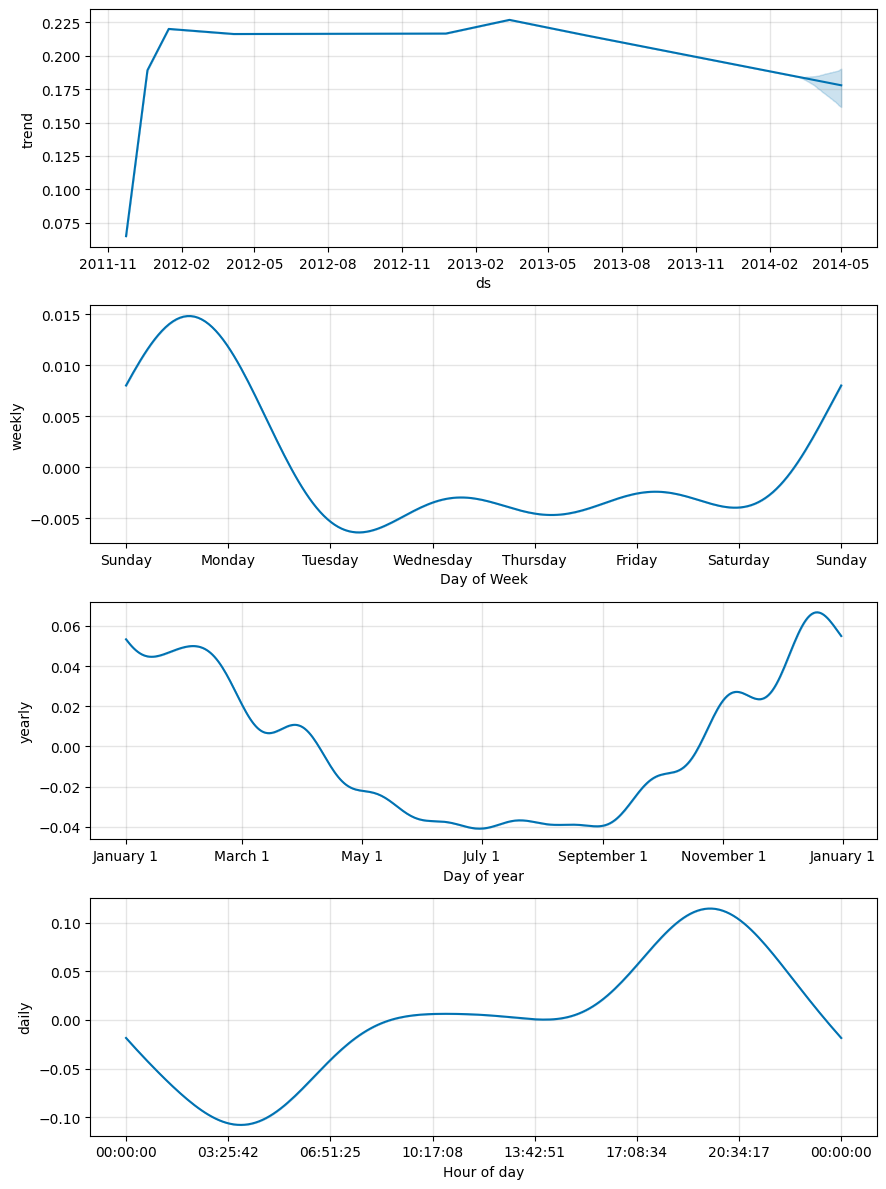

In [34]:
fig = m.plot_components(fcst)


In [35]:
fcst

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2011-11-23 11:00:00,0.064957,0.041211,0.138526,0.064957,0.064957,0.027792,0.027792,0.027792,0.006194,...,-0.003134,-0.003134,-0.003134,0.024732,0.024732,0.024732,0.0,0.0,0.0,0.092748
1,2011-11-23 11:30:00,0.065054,0.043177,0.139940,0.065054,0.065054,0.027376,0.027376,0.027376,0.005806,...,-0.003176,-0.003176,-0.003176,0.024747,0.024747,0.024747,0.0,0.0,0.0,0.092431
2,2011-11-23 12:00:00,0.065152,0.042335,0.143176,0.065152,0.065152,0.026593,0.026593,0.026593,0.005053,...,-0.003221,-0.003221,-0.003221,0.024762,0.024762,0.024762,0.0,0.0,0.0,0.091745
3,2011-11-23 12:30:00,0.065249,0.042992,0.136786,0.065249,0.065249,0.025418,0.025418,0.025418,0.003910,...,-0.003270,-0.003270,-0.003270,0.024777,0.024777,0.024777,0.0,0.0,0.0,0.090667
4,2011-11-23 13:00:00,0.065347,0.044714,0.136839,0.065347,0.065347,0.023941,0.023941,0.023941,0.002470,...,-0.003321,-0.003321,-0.003321,0.024792,0.024792,0.024792,0.0,0.0,0.0,0.089288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41206,2014-04-30 20:00:00,0.177958,0.216637,0.316857,0.161763,0.190283,0.086330,0.086330,0.086330,0.112450,...,-0.004160,-0.004160,-0.004160,-0.021960,-0.021960,-0.021960,0.0,0.0,0.0,0.264288
41207,2014-04-30 21:00:00,0.177953,0.192045,0.293903,0.161746,0.190308,0.065646,0.065646,0.065646,0.091881,...,-0.004269,-0.004269,-0.004269,-0.021966,-0.021966,-0.021966,0.0,0.0,0.0,0.243599
41208,2014-04-30 22:00:00,0.177948,0.156530,0.256777,0.161730,0.190334,0.030338,0.030338,0.030338,0.056679,...,-0.004369,-0.004369,-0.004369,-0.021972,-0.021972,-0.021972,0.0,0.0,0.0,0.208286
41209,2014-04-30 23:00:00,0.177943,0.115128,0.217359,0.161713,0.190359,-0.008693,-0.008693,-0.008693,0.017742,...,-0.004457,-0.004457,-0.004457,-0.021979,-0.021979,-0.021979,0.0,0.0,0.0,0.169250


# Cross-Validate

In [38]:

df_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '90 days')


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
  0%|                                                                                                    | 0/3 [00:00<?, ?it/s]20:39:57 - cmdstanpy - INFO - Chain [1] start processing
20:39:59 - cmdstanpy - INFO - Chain [1] done processing
 33%|██████████████████████████████▋                                                             | 1/3 [00:11<00:23, 11.92s/it]20:40:09 - cmdstanpy - INFO - Chain [1] start processing
20:40:34 - cmdstanpy - INFO - Chain [1] done processing
 67%|█████████████████████████████████████████████████████████████▎                              | 2/3 [00:46<00:25, 25.37s/it]20:40:44 - cmdstanpy - INFO - Chain [1] start processing
20:41:20 - cmdstanpy - INFO - Chain [1] done processing
100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:48<00:00, 36.31s/it]


In [40]:
df_cv


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-12-05 00:30:00,0.278441,0.231852,0.327275,0.256325,2012-12-05
1,2012-12-05 01:00:00,0.263134,0.212906,0.315464,0.226200,2012-12-05
2,2012-12-05 01:30:00,0.249035,0.196969,0.303322,0.227562,2012-12-05
3,2012-12-05 02:00:00,0.236453,0.187236,0.283160,0.201766,2012-12-05
4,2012-12-05 02:30:00,0.225977,0.173768,0.274150,0.177013,2012-12-05
...,...,...,...,...,...,...
12955,2014-02-27 22:00:00,0.259928,0.201743,0.320800,0.303973,2013-11-30
12956,2014-02-27 22:30:00,0.240038,0.178309,0.297353,0.295760,2013-11-30
12957,2014-02-27 23:00:00,0.220280,0.158648,0.280580,0.259133,2013-11-30
12958,2014-02-27 23:30:00,0.201357,0.142726,0.264360,0.214800,2013-11-30


# Permorfance Metrics 

In [43]:
df_p = performance_metrics(df_cv)

In [44]:
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days 00:00:00,0.004913,0.070095,0.052524,0.253408,0.179424,0.212352,0.608025
1,9 days 00:30:00,0.004922,0.070156,0.052610,0.253779,0.179630,0.212668,0.607253
2,9 days 01:00:00,0.004938,0.070274,0.052725,0.254355,0.180088,0.213097,0.605710
3,9 days 01:30:00,0.004958,0.070411,0.052846,0.255001,0.180504,0.213545,0.604938
4,9 days 02:00:00,0.004976,0.070543,0.052968,0.255738,0.181532,0.214059,0.603395


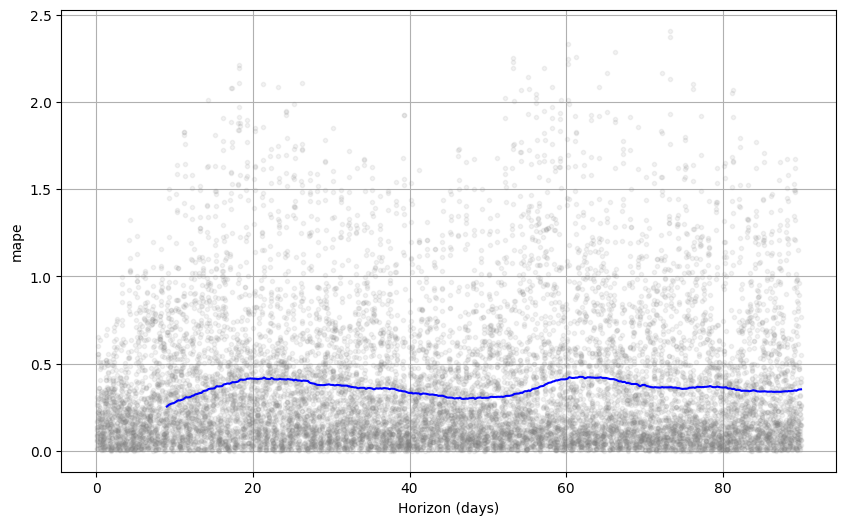

In [46]:

fig = plot_cross_validation_metric(df_cv, metric='mape')
